<a href="https://colab.research.google.com/github/dayasri/Dayasri/blob/main/source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

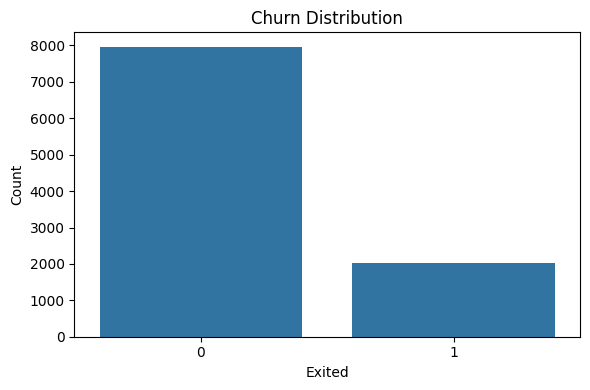

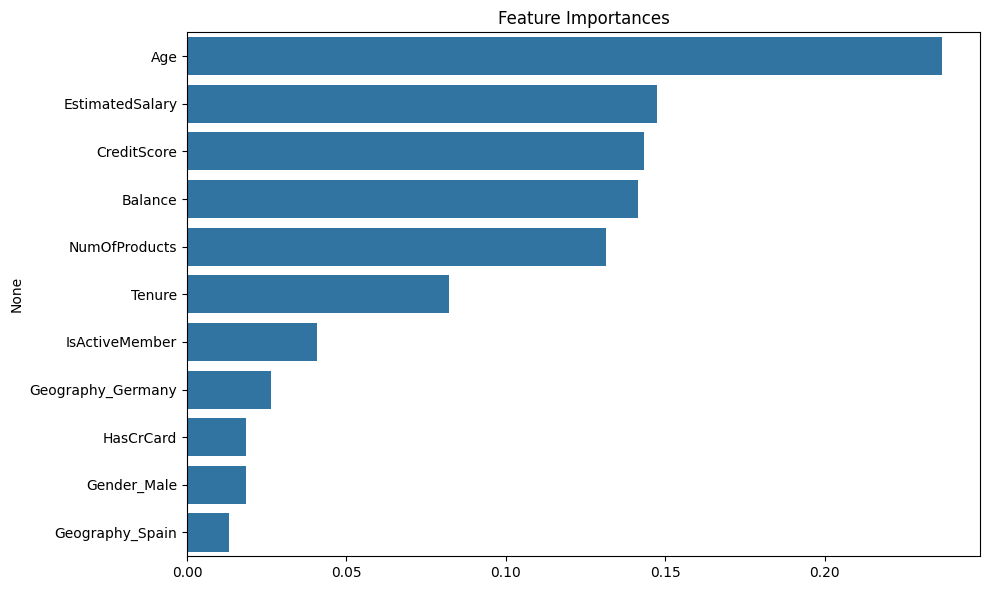

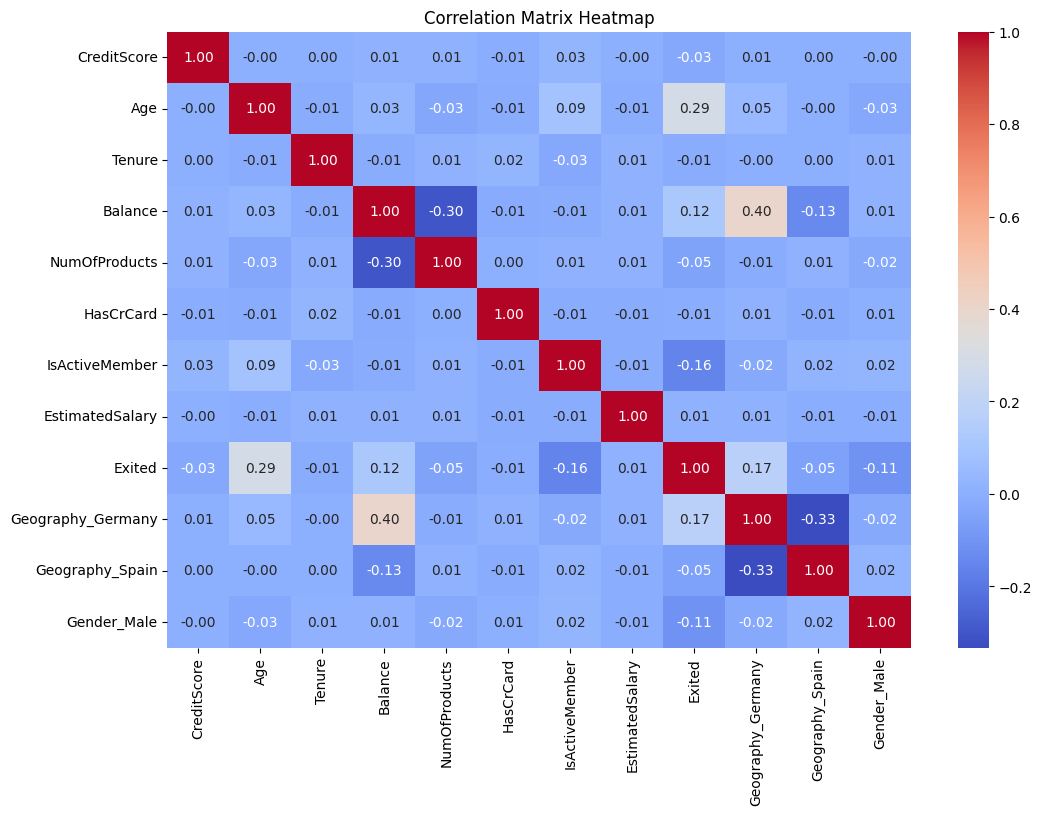

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import plotly.express as px

# Load dataset
df = pd.read_csv("Churn_Modelling.csv")

# Data Cleaning: Drop irrelevant columns
df_cleaned = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# EDA: Check missing values and churn distribution
missing = df_cleaned.isnull().sum()
churn_rate = df_cleaned['Exited'].mean()

# Visualization: Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df_cleaned)
plt.title("Churn Distribution")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("churn_distribution.png")
plt.show()

# Feature Engineering: One-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=['Geography', 'Gender'], drop_first=True)

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(df_encoded.drop('Exited', axis=1))
y = df_encoded['Exited'].values

# Model Development
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Visualization:
importances = model.feature_importances_
features = df_encoded.drop('Exited', axis=1).columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances")
plt.tight_layout()
plt.savefig("feature_importances.png")
plt.show()

#heatmap
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.savefig("heatmap_modelling.png")
plt.show()

#plotly
fig = px.imshow(correlation_matrix,
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu_r',
                title="Correlation Matrix Heatmap")
fig.show()

# Save model
joblib.dump(model, "churn_model.pkl")

# Documentation
with open("model_report.txt", "w") as f:
    f.write("Missing Values:\n")
    f.write(str(missing) + "\n\n")
    f.write(f"Churn Rate: {churn_rate:.2f}\n\n")
    f.write("Classification Report:\n")
    f.write(report)

print(df)